In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [36]:
nsfg = pd.read_hdf('nsfg.hdf5','nsfg')
#que : what is the average birth weight for babies in the U.S.? 

### Dataframe Exploration 

In [3]:
type(nsfg)

pandas.core.frame.DataFrame

In [4]:
nsfg.head()

,caseid,outcome,birthwgt_lb1,birthwgt_oz1,prglngth,nbrnaliv,agecon,agepreg,hpagelb,wgt2013_2015
0,60418,1,5.0,4.0,40,1.0,2000,2075.0,22.0,3554.964843
1,60418,1,4.0,12.0,36,1.0,2291,2358.0,25.0,3554.964843
2,60418,1,5.0,4.0,36,1.0,3241,3308.0,52.0,3554.964843
3,60419,6,NaN,NaN,33,NaN,3650,NaN,NaN,2484.535358
4,60420,1,8.0,13.0,41,1.0,2191,2266.0,24.0,2903.782914


To get the number of rows and columns in a DataFrame, one can read its shape attribute.

In [6]:
nsfg.shape   #rows,columns

(9358, 10)

To get the column names, you can read the columns attribute. The result is an Index, which is a Pandas data structure that is similar to a list.

In [8]:
nsfg.columns #column name of df in form of Index

Index(['caseid', 'outcome', 'birthwgt_lb1', 'birthwgt_oz1', 'prglngth',
       'nbrnaliv', 'agecon', 'agepreg', 'hpagelb', 'wgt2013_2015'],
      dtype='object')

In [15]:
pounds = nsfg['birthwgt_lb1'] # select column pound part of weight
type(pounds) # selecting 1 column give result as series

pandas.core.series.Series

In [11]:
pounds.head() #head of series or columns

0    5.0
1    4.0
2    5.0
3    NaN
4    8.0
Name: birthwgt_lb1, dtype: float64

In [16]:
ounces = nsfg['birthwgt_oz1'] #ounce part of birth weight
ounces.head()

0     4.0
1    12.0
2     4.0
3     NaN
4    13.0
Name: birthwgt_oz1, dtype: float64

### Cleaning and Validate

Before we do anything with this data, we have to validate it. One part of validation is confirming that we are interpreting the data correctly. 

1. We can use value_counts() to see what values appear in pounds and how many times each value appears. By default, the results are sorted with the most frequent value first, so I use sort_index() to sort them by value instead, with the lightest babies first and heaviest babies last. 

In [14]:
pounds.value_counts().sort_index()

0.0        6
1.0       34
2.0       47
3.0       67
4.0      196
5.0      586
6.0     1666
7.0     2146
8.0     1168
9.0      363
10.0      82
11.0      17
12.0       7
13.0       2
14.0       2
17.0       1
98.0       1
99.0      94
Name: birthwgt_lb1, dtype: int64

We can validate the results by comparing them to the codebook, which lists the values and their frequencies.

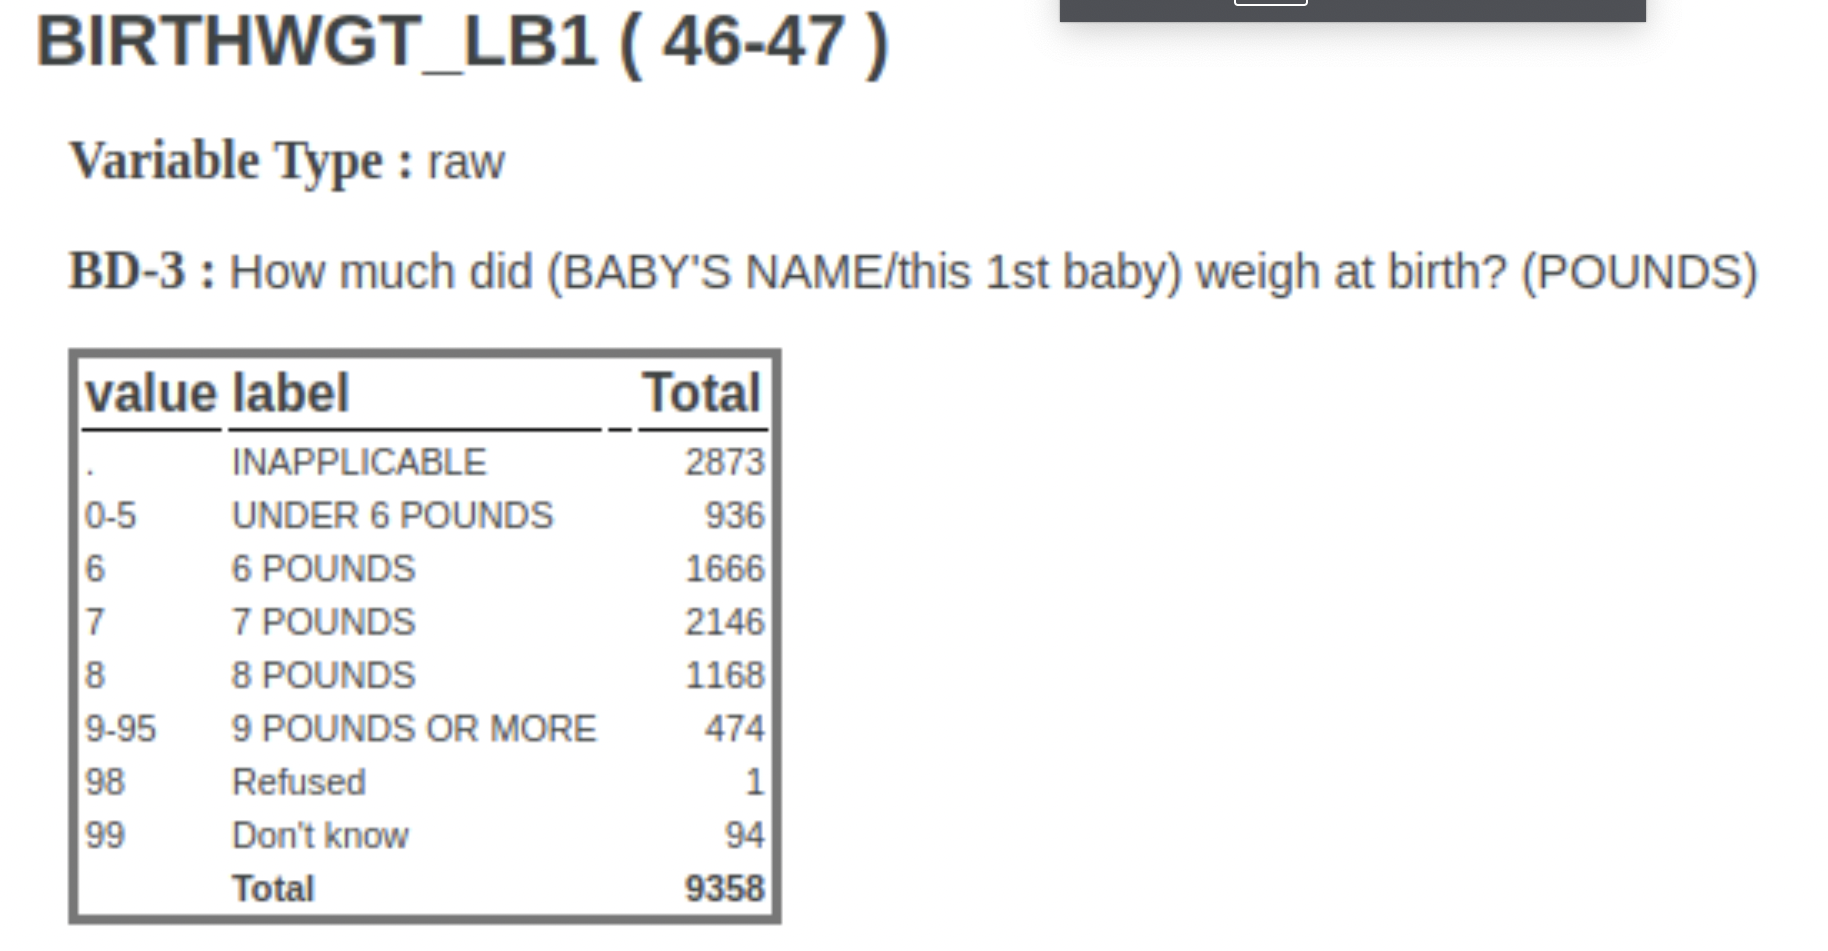

The results here agree with the codebook, so we have some confidence that we are reading and interpreting the data correctly.

2. Another way to validate the data is with describe(), which computes summary statistics like the mean, standard deviation, min, and max.

In [17]:
pounds.describe()

count    6485.000000
mean        8.055204
std        11.178893
min         0.000000
25%         6.000000
50%         7.000000
75%         8.000000
max        99.000000
Name: birthwgt_lb1, dtype: float64

The mean is about 8.05, but that doesn't mean much because it includes the special values 98 and 99. Before we can really compute the mean, we have to replace those values with NaN to represent missing data.

The replace() method does what we want; it takes a list of values we want to replace and the value we want to replace them with. np dot nan means we are getting the special value NaN from the NumPy library, which is imported as np.

<b> 1. birthwgt_lb1 = weight in pound

In [20]:
pounds = pounds.replace([98,99], np.nan)
pounds.mean()

6.703286384976526

The mean of the original series was about 8 point 05 pounds. The mean of the new series is about 6 point 7 pounds. It makes a big difference when you remove a few 99-pound babies!

The result from replace() is a new Series, which I assign back to pounds. Instead of making a new Series, you can call replace() with inplace=True, which modifies the existing Series "in place", that is, without making a copy. 

In [21]:
ounces.value_counts().sort_index()

0.0     757
1.0     297
2.0     429
3.0     393
4.0     386
5.0     407
6.0     543
7.0     346
8.0     518
9.0     377
10.0    295
11.0    418
12.0    388
13.0    275
14.0    258
15.0    268
98.0      1
99.0     35
Name: birthwgt_oz1, dtype: int64

<b> 2. birthwgt_oz1 = weight in ounces

In [22]:
ounces.replace([98,99], np.nan, inplace=True)

In [23]:
ounces.value_counts().sort_index()

0.0     757
1.0     297
2.0     429
3.0     393
4.0     386
5.0     407
6.0     543
7.0     346
8.0     518
9.0     377
10.0    295
11.0    418
12.0    388
13.0    275
14.0    258
15.0    268
Name: birthwgt_oz1, dtype: int64

Now we want to combine pounds and ounces into a single Series that contains total birth weight. Arithmetic operators work with Series objects

In [24]:
birth_weight = pounds + ounces/16.0

In [25]:
birth_weight.describe()

count    6355.000000
mean        7.120978
std         1.422236
min         0.000000
25%         6.375000
50%         7.187500
75%         8.000000
max        17.937500
dtype: float64

In [27]:
birth_weight

0       5.2500
1       4.7500
2       5.2500
3          NaN
4       8.8125
         ...  
9353    4.6875
9354    8.4375
9355    7.3750
9356    8.1875
9357    8.3125
Length: 9358, dtype: float64

<b> 3. outcome
    
In the NSFG dataset, the variable 'outcome' encodes the outcome of each pregnancy as shown below:

value---label
1.	   Live birth
2.	   Induced abortion
3.	   Stillbirth
4.	   Miscarriage
5.	   Ectopic pregnancy
6. 	   Current pregnancy

In [29]:
nsfg['outcome'].value_counts()

1    6489
4    1469
2     947
6     249
5     118
3      86
Name: outcome, dtype: int64

The number of preganancies ended with a live birth is 6489, Induced abortion is 1469.

<b> 4. nbrnaliv = numbers of babies alive at end of pregnancy
    
In the NSFG dataset, the variable 'nbrnaliv' records the number of babies born alive at the end of a pregnancy.

If you use .value_counts() to view the responses, you'll see that the value 8 appears once, and if you consult the codebook, you'll see that this value indicates that the respondent refused to answer the question.

In [30]:
nsfg['nbrnaliv'].value_counts()

1.0    6379
2.0     100
3.0       5
8.0       1
Name: nbrnaliv, dtype: int64

In [32]:
nsfg['nbrnaliv'].replace([8], np.nan, inplace=True)
nsfg['nbrnaliv'].value_counts()

1.0    6379
2.0     100
3.0       5
Name: nbrnaliv, dtype: int64

<b>5. 6. agecon & agepreg (Compute a variable)
    
For each pregnancy in the NSFG dataset, the variable 'agecon' encodes the respondent's age at conception, and 'agepreg' the respondent's age at the end of the pregnancy.

Both variables are recorded as integers with two implicit decimal places, so the value 2575 means that the respondent's age was 25.75.

In [33]:
agecon = nsfg['agecon'] / 100
agepreg = nsfg['agepreg'] / 100

Compute the difference, which is an estimate of the duration of the pregnancy. Keep in mind that for each pregnancy, agepreg will be larger than agecon.

In [34]:
preg_length = agepreg - agecon

In [35]:
preg_length.describe()

count    9109.000000
mean        0.552069
std         0.271479
min         0.000000
25%         0.250000
50%         0.670000
75%         0.750000
max         0.920000
dtype: float64

 A variable that's computed from other variables is sometimes called a 'recode'.

### Filter and Visualize 

Histograms are one of the most useful tools in exploratory data analysis. They quickly give you an overview of the distribution of a variable, that is, what values the variable can have, and how many times each value appears.

pyplot doesn't work with NaNs, so we have to use dropna(), which makes a new Series that contains only the valid values. The second argument, bins, tells hist to divide the range of weights into 30 intervals, called "bins", and count how many values fall in each bin.

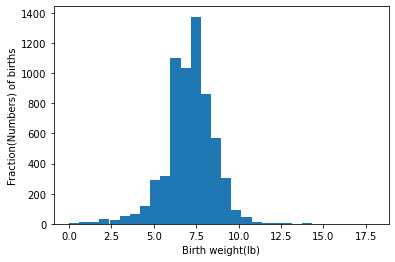

In [40]:
plt.hist(birth_weight.dropna(), bins=30)

plt.xlabel('Birth weight(lb)')
plt.ylabel('Fraction(Numbers) of births')
plt.show()

The distribution looks a little like a bell curve, but the tail is longer on the left than on the right; that is, there are more light babies than heavy babies. That makes sense because the distribution includes some babies that were born preterm. The most common duration for pregnancy is 39 weeks, which is "full term"; "preterm" is usually defined to be less than 37 weeks.

To see which babies are preterm, we can use the prglngth column, which records pregnancy length in weeks.

In [41]:
preterm = nsfg['prglngth'] < 37
preterm.head()

0    False
1     True
2     True
3     True
4    False
Name: prglngth, dtype: bool

When you compare a Series to a value, the result is a Boolean Series; that is, each element is a Boolean value, True or False. In this case, it's True for each preterm baby and False otherwise.

In [42]:
preterm.sum() #sum of Trues as 1 = numbers of preterm babies

3742

In [43]:
preterm.mean() #fraction of trues = portion of babies preterm.

0.39987176747168196

40% of the births are preterm in given dataset.

<b> Way 1 filtering
    
We can use a Boolean Series as a filter; that is, we can select only rows that satisfy a condition or meet some criterion.

For example, we can use preterm and the bracket operator to select values from birth_weight, so preterm_weight contains birth weights for preterm babies.

To select full-term babies, we can use the tilde operator(option+N), which is "logical NOT" or inverse; it makes the Trues false and the Falses true.

In [45]:
preterm_weight = birth_weight[preterm]
preterm_weight.mean() #mean weight of preterm babies

5.577598314606742

In [47]:
fullterm_weight = birth_weight[~preterm] # option+N for tidle sign
fullterm_weight.mean() #mean weight of fullterm babies

7.372323879231473

Full term babies are heavier, on average, than preterm babies.

<b> Way 2 filtering
    
We computed the mean birth weight for full-term babies and filtered out preterm babies because their distribution of weight is different.

The distribution of weight is also different for multiple births, like twins and triplets. In this exercise, you'll filter them out, too, and see what effect it has on the mean.

In [50]:
# Create a Boolean Series for full-term babies
full_term = nsfg['prglngth'] >= 37

# Select the weights of full-term babies
full_term_weight = birth_weight[full_term]

# Compute the mean weight of full-term babies
print(full_term_weight.mean())

7.372323879231473


In [51]:
# Filter single births
single = nsfg['nbrnaliv'] == 1

# Compute birth weight for single full-term babies
single_full_term_weight = birth_weight[full_term & single]
print('Single full-term mean:', single_full_term_weight.mean())

# Compute birth weight for multiple full-term babies
mult_full_term_weight = birth_weight[full_term & (~single)]
print('Multiple full-term mean:', mult_full_term_weight.mean())

Single full-term mean: 7.385643450184502
Multiple full-term mean: 5.768055555555556


Steps we followed
1. Use the variable 'nbrnaliv' to make a Boolean Series that is True for single births (where 'nbrnaliv' equals 1) and False otherwise.
2. Use Boolean Series and logical operators to select single, full-term babies and compute their mean birth weight.
3. For comparison, select multiple, full-term babies and compute their mean birth weight.

<b>Note</b>: There's one more thing we have to do before we can answer our question: resampling. The NSFG is not exactly representative of the U.S. population; by design, some groups are more likely to appear in the sample than others; they are "oversampled". Oversampling helps to ensure that you have enough people in every subgroup to get reliable statistics, but it makes the analysis a little more complicated. However, we can correct for oversampling by resampling. (One suggested function called resample_rows_weighted() can be use for this exercises.)

<b>practice part

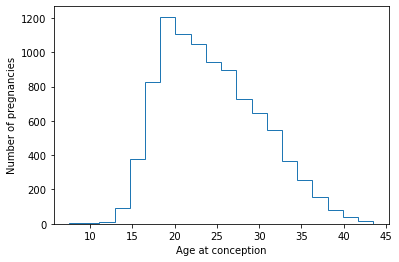

In [49]:
# Plot the histogram and to make an unfilled histogram set parameter histtype = 'step'
plt.hist(agecon.dropna(), bins=20, histtype='step')

# Label the axes
plt.xlabel('Age at conception')
plt.ylabel('Number of pregnancies')

# Show the figure
plt.show()